# Adapted from notebook written by Federica B. Bianco @fedhere
# Completed by Jonathan Toy @jontoy
# NYU CUSP PUI2016
# Assignment 1 Homework 3
# This is a skeleton & instruction notebook
- ## GENERATE  100 samples of different sizes N (N>10 & N<2000) from each of 5 different distributions (500 samples in total), 
## _all with the same population mean_. Include a _Normal_, a _Poisson_, a _Binomial_, a _Chi-Squared_ distribution, and 1 more of your choice.                                       
- ## For each sample plot the sample mean (dependent var.) against the sample size N (independent var.) (if you want you can do it with the sample standard deviation as well). 
- ## Describe the behavior you see in the plots in terms of the law of large numbers.
- ## PLOT the distributions of all sample means (together for all distributions). _Mandatory_: as a histogram. _Optional_: in any other way you think is convincing
## Extra Credit: FIT a gaussian to the distribution of means            

In [141]:
from __future__ import print_function
# Based on notebook written by Federica B. Bianco
#__author__= 'fbb'

import numpy as np
import pylab as pl
# this package sets up pretty plots
import seaborn
from scipy.optimize import curve_fit, minimize
import scipy.stats
    
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## choose which distributions to use 

In [89]:
#distributions = ['pois', 'gaus', 'chisq', 'cauchy', 'lnorm', 'binomial']
distributions = ['chisq']


## and which mean to give it

In [90]:
mymean = 100

# Let's see what this distribution looks like, what is the PDF, and how are the moments defined. Wikipedia is great for this! 

![1](chisq1.png)

![2](chisq2.png)

# Then lets look at the numpy random sampling package to see how I create the distribution
http://docs.scipy.org/doc/numpy/reference/routines.random.html
http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.chisquare.html#numpy.random.chisquare

![numpy](numpy_chisq.png)


In [91]:
# the chi sq distribution takes the number of degrees of freedom, which luckily is the same as the mean!
df = mymean

## I am making a dictionary to host the distributions.

that is only one possible option. with a dictionary I can easily inspect the distribution I want by its name: it is a very human friendly data storage. In this example I am only using a single distribution, so for me it is overkill, but if I were doing the whole exercise with 5 or 6 distributions it would be useful!

Lets start by looking at a single chi sq distribution

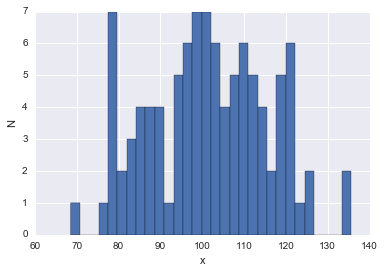

In [92]:
# Note: I am adding imports here, to show the workflow: 
# at this point I realize what packages I need and I import them. 
# but this is a PEP8 violation. 
# It is a good habit to put the includes at the top 
# so the code fails right away if the packages are missing. 
# Otherwise a user may have a piece of code running for a long time, 
# and then fail when the package cannot be imported... 
# (unless they are only imported under conditions, e.g. in an if statement)

# Note: changed the code to import numpy at the beginning of the code

#import numpy as np
md = {}
# md is an empty disctionary
md['chisq'] = np.random.chisquare(df, size=100)
# md now is a dictionary with one object: an array by the key 'chisq'
pl.hist(md['chisq'], bins = 30)
pl.ylabel('N')
pl.xlabel('x')

### Figure 1: Chi sq distribution: df = 100, N=100

## let numpy calculate what the mean and stdev of this distribution are

In [93]:
print ("Chisq mean: %.2f, standard deviation: %.2f"%(md['chisq'].mean(), md['chisq'].std()))

Chisq mean: 101.57, standard deviation: 14.18


## Now let's do it for 100 Chisq distributions
we want distributions of different sizes (all integers between 10 and 2000)

In [94]:
mysize = (2000 / (np.array(range(1, 100)))).astype(int)
# mysize = 1000 / (np.array(range(1, 100) + [10]))
# mysize = (np.random.rand(100) * 1000).astype(int)
print (mysize, mysize.shape)

# We will use these same sizes for all of the distributions and only need to declare it once

[2000 1000  666  500  400  333  285  250  222  200  181  166  153  142  133
  125  117  111  105  100   95   90   86   83   80   76   74   71   68   66
   64   62   60   58   57   55   54   52   51   50   48   47   46   45   44
   43   42   41   40   40   39   38   37   37   36   35   35   34   33   33
   32   32   31   31   30   30   29   29   28   28   28   27   27   27   26
   26   25   25   25   25   24   24   24   23   23   23   22   22   22   22
   21   21   21   21   21   20   20   20   20] (99,)


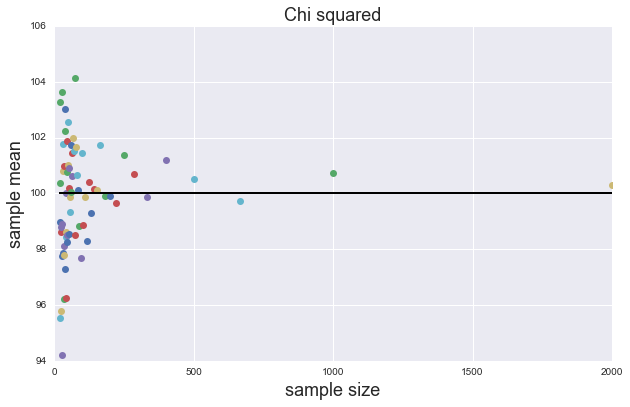

In [95]:
# I am gonna overwrite the disctionary entry created into a nested dictionary 
# the outside dictionary hosts the distributions as dictionary, 
# and each distribution dictionary contains the 100 distribution (arrays of diferent sizes)

md['chisq'] = {} 

#and do it in a for loop. not pythonic, but easily readable

for n in mysize:
    md['chisq'][n] = np.random.chisquare(df, size = n)
    
# save the means for plotting later    

md['chisq']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['chisq']:
    if not type(nn) == str:
        md['chisq']['means'][nn] = md['chisq'][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, md['chisq']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Chi squared', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

### Figure 2: A graph showing the relationship between sample size and sample mean for i.i.d. Chi squared variables. As sample size increases, the variance from the plotted population mean shrinks towards 0.

# now the histogram of the mean of all samples: 
## this requires some data wrangling, since i put the data in a dictionary which is a user friendly data structure, but perhaps not the most machine friendly one

a coder friendly, though not terribly pythonic way to do it is to append each mean in a list in a for loop, and then hist that. be careful: if your data size gets large this becomes a very bad idea!!

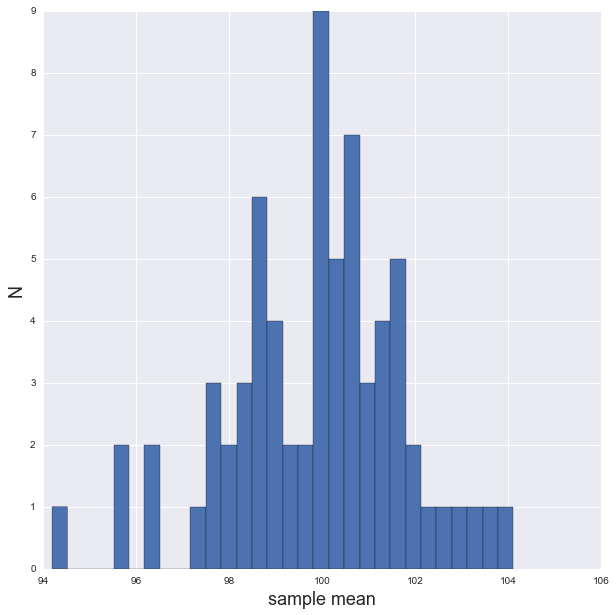

In [96]:
allmeans_Chisq = list(md['chisq']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans_Chisq,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

## Figure 3: A histogram for the distribution of sample means for the Chi squared distributions

# Do it for the Normal distribution


In [97]:
#distributions = ['pois', 'gaus', 'chisq', 'cauchy', 'lnorm', 'binomial']
distributions = ['gaus']


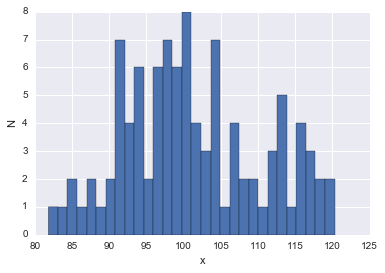

In [98]:
standev = 10
md = {}
# md is an empty disctionary
md['gaus'] = np.random.normal(mymean, standev, size=100)
# md now is a dictionary with one object: an array by the key 'chisq'
pl.hist(md['gaus'], bins = 30)
pl.ylabel('N')
pl.xlabel('x')

### Figure 4: Gaussian distribution: mean = 100, std = 10, N=100¶

In [99]:
print ("Gaus mean: %.2f, standard deviation: %.2f"%(md['gaus'].mean(), md['gaus'].std()))

Gaus mean: 101.20, standard deviation: 9.26


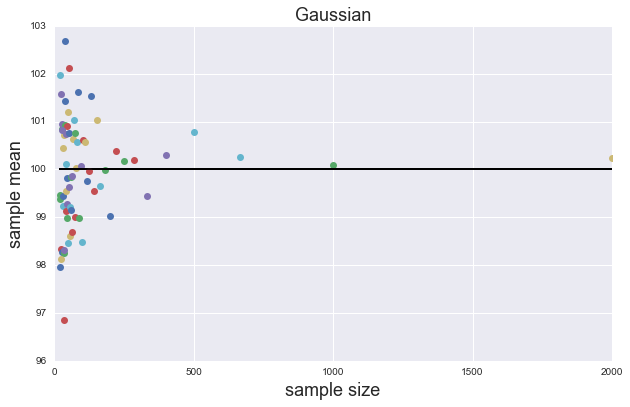

In [101]:
md['gaus'] = {} 

#and do it in a for loop. not pythonic, but easily readable

for n in mysize:
    md['gaus'][n] = np.random.normal(mymean, standev, size = n)
    
# save the means for plotting later    

md['gaus']['means'] = {}
axgaus_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['gaus']:
    if not type(nn) == str:
        md['gaus']['means'][nn] = md['gaus'][nn].mean()
        #and plot it
        axgaus_mu_n.plot(nn, md['gaus']['means'][nn], 'o')
        axgaus_mu_n.set_xlabel('sample size', fontsize=18)
        axgaus_mu_n.set_ylabel('sample mean', fontsize=18)
        axgaus_mu_n.set_title('Gaussian', fontsize=18)
        axgaus_mu_n.plot([min(mysize), max(mysize)], [mymean, mymean], 'k')

### Figure 5: A graph showing the relationship between sample size and sample mean for i.i.d. gaussian variables. As sample size increases, the variance from the plotted population mean shrinks towards 0.

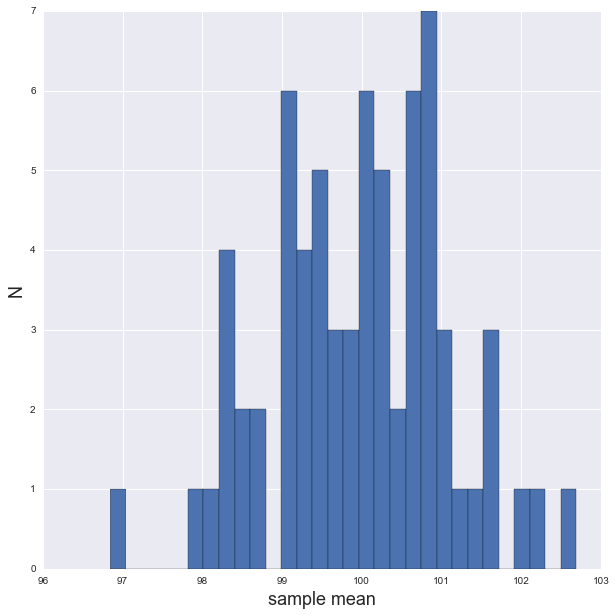

In [102]:
allmeans_gaus = list(md['gaus']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans_gaus,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

## Figure 6: A histogram for the distribution of sample means for the gaussian distributions

# Do it for the Poisson distribution

In [103]:
distributions = ['pois']


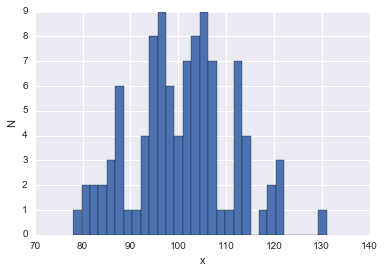

In [104]:
md = {}
# md is an empty disctionary
md['pois'] = np.random.poisson(mymean, size=100)
# md now is a dictionary with one object: an array by the key 'chisq'
pl.hist(md['pois'], bins = 30)
pl.ylabel('N')
pl.xlabel('x')

### Figure 7: Poisson distribution: lambda = 100, N=100¶

In [105]:
print ("Poisson mean: %.2f, standard deviation: %.2f"%(md['pois'].mean(), md['pois'].std()))

Poisson mean: 100.68, standard deviation: 10.46


In [106]:
mysize = (2000 / (np.array(range(1, 100)))).astype(int)
# mysize = 1000 / (np.array(range(1, 100) + [10]))
# mysize = (np.random.rand(100) * 1000).astype(int)
print (mysize, mysize.shape)

[2000 1000  666  500  400  333  285  250  222  200  181  166  153  142  133
  125  117  111  105  100   95   90   86   83   80   76   74   71   68   66
   64   62   60   58   57   55   54   52   51   50   48   47   46   45   44
   43   42   41   40   40   39   38   37   37   36   35   35   34   33   33
   32   32   31   31   30   30   29   29   28   28   28   27   27   27   26
   26   25   25   25   25   24   24   24   23   23   23   22   22   22   22
   21   21   21   21   21   20   20   20   20] (99,)


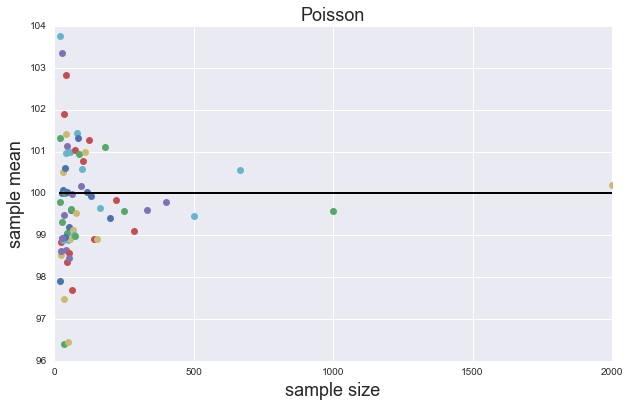

In [107]:
md['pois'] = {} 

#and do it in a for loop. not pythonic, but easily readable

for n in mysize:
    md['pois'][n] = np.random.poisson(mymean, size = n)
    
# save the means for plotting later    

md['pois']['means'] = {}
axpois_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['pois']:
    if not type(nn) == str:
        md['pois']['means'][nn] = md['pois'][nn].mean()
        #and plot it
        axpois_mu_n.plot(nn, md['pois']['means'][nn], 'o')
        axpois_mu_n.set_xlabel('sample size', fontsize=18)
        axpois_mu_n.set_ylabel('sample mean', fontsize=18)
        axpois_mu_n.set_title('Poisson', fontsize=18)
        axpois_mu_n.plot([min(mysize), max(mysize)], [mymean, mymean], 'k')

### Figure 8: A graph showing the relationship between sample size and sample mean for i.i.d. poisson variables. As sample size increases, the variance from the plotted population mean shrinks towards 0.

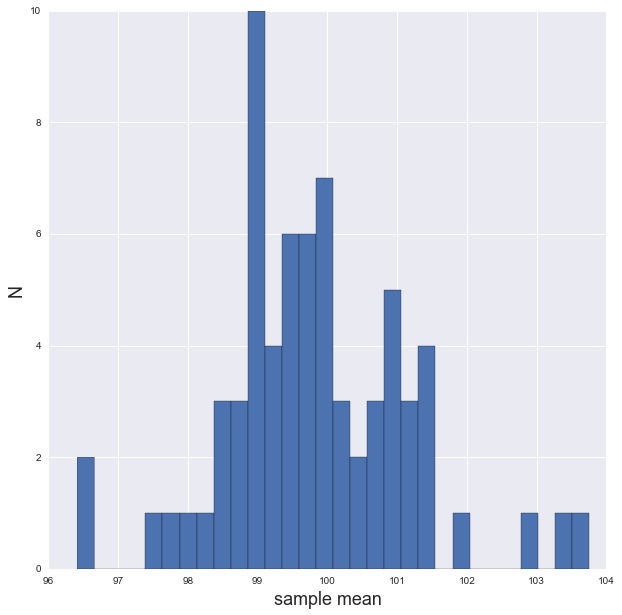

In [108]:
allmeans_pois = list(md['pois']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans_pois,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

## Figure 9: A histogram for the distribution of sample means for the poisson distributions

# Do it for the Binomial distribution

In [109]:
distributions = ['binomial']


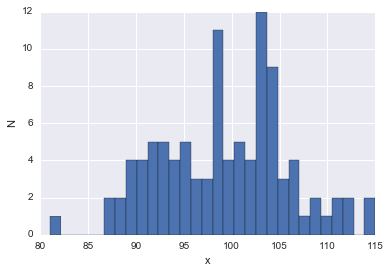

In [110]:
trials = 200
p = mymean / trials
md = {}
# md is an empty disctionary
md['binomial'] = np.random.binomial(trials, p, size=100)
# md now is a dictionary with one object: an array by the key 'chisq'
pl.hist(md['binomial'], bins = 30)
pl.ylabel('N')
pl.xlabel('x')

### Figure 10: Binomial distribution: n = 200, p = 0.5, N=100¶

In [111]:
print ("Binomial mean: %.2f, standard deviation: %.2f"%(md['binomial'].mean(), md['binomial'].std()))

Binomial mean: 99.29, standard deviation: 6.68


In [112]:
mysize = (2000 / (np.array(range(1, 100)))).astype(int)
# mysize = 1000 / (np.array(range(1, 100) + [10]))
# mysize = (np.random.rand(100) * 1000).astype(int)
print (mysize, mysize.shape)

[2000 1000  666  500  400  333  285  250  222  200  181  166  153  142  133
  125  117  111  105  100   95   90   86   83   80   76   74   71   68   66
   64   62   60   58   57   55   54   52   51   50   48   47   46   45   44
   43   42   41   40   40   39   38   37   37   36   35   35   34   33   33
   32   32   31   31   30   30   29   29   28   28   28   27   27   27   26
   26   25   25   25   25   24   24   24   23   23   23   22   22   22   22
   21   21   21   21   21   20   20   20   20] (99,)


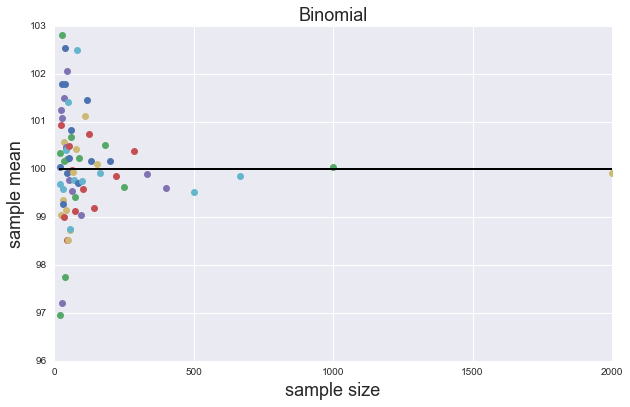

In [113]:
md['binomial'] = {} 

#and do it in a for loop. not pythonic, but easily readable

for n in mysize:
    md['binomial'][n] = np.random.binomial(trials, p, size = n)
    
# save the means for plotting later    

md['binomial']['means'] = {}
axbinomial_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['binomial']:
    if not type(nn) == str:
        md['binomial']['means'][nn] = md['binomial'][nn].mean()
        #and plot it
        axbinomial_mu_n.plot(nn, md['binomial']['means'][nn], 'o')
        axbinomial_mu_n.set_xlabel('sample size', fontsize=18)
        axbinomial_mu_n.set_ylabel('sample mean', fontsize=18)
        axbinomial_mu_n.set_title('Binomial', fontsize=18)
        axbinomial_mu_n.plot([min(mysize), max(mysize)], [mymean, mymean], 'k')

### Figure 11: A graph showing the relationship between sample size and sample mean for i.i.d. binomial variables. As sample size increases, the variance from the plotted population mean shrinks towards 0.

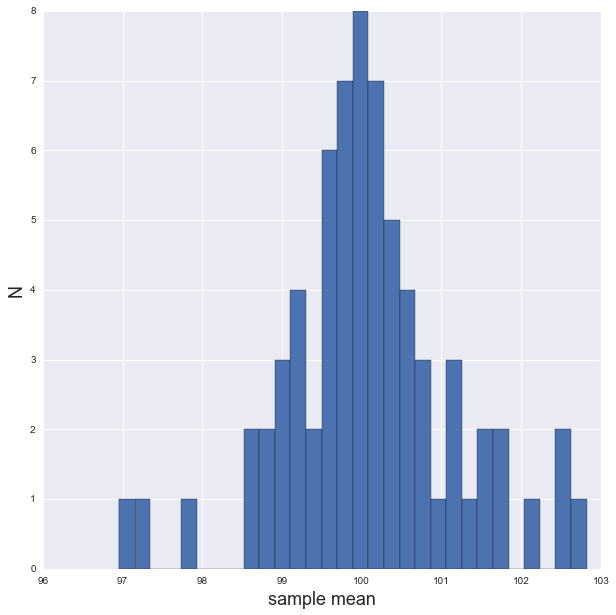

In [114]:
allmeans_bin = list(md['binomial']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans_bin,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

### Figure 12: A histogram for the distribution of sample means for the binomial distributions

# Do it for an exponential distribution

In [115]:
distributions = ['expo']


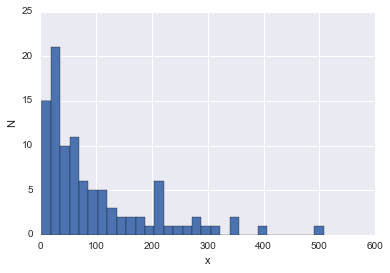

In [116]:
md = {}
# md is an empty disctionary
md['expo'] = np.random.exponential(mymean, size=100)
# md now is a dictionary with one object: an array by the key 'chisq'
pl.hist(md['expo'], bins = 30)
pl.ylabel('N')
pl.xlabel('x')

### Figure 13: Exponential distribution: beta = 100, N=100¶

In [117]:
print ("Exponential mean: %.2f, standard deviation: %.2f"%(md['expo'].mean(), md['expo'].std()))

Exponential mean: 95.69, standard deviation: 99.35


In [118]:
mysize = (2000 / (np.array(range(1, 100)))).astype(int)
# mysize = 1000 / (np.array(range(1, 100) + [10]))
# mysize = (np.random.rand(100) * 1000).astype(int)
print (mysize, mysize.shape)

[2000 1000  666  500  400  333  285  250  222  200  181  166  153  142  133
  125  117  111  105  100   95   90   86   83   80   76   74   71   68   66
   64   62   60   58   57   55   54   52   51   50   48   47   46   45   44
   43   42   41   40   40   39   38   37   37   36   35   35   34   33   33
   32   32   31   31   30   30   29   29   28   28   28   27   27   27   26
   26   25   25   25   25   24   24   24   23   23   23   22   22   22   22
   21   21   21   21   21   20   20   20   20] (99,)


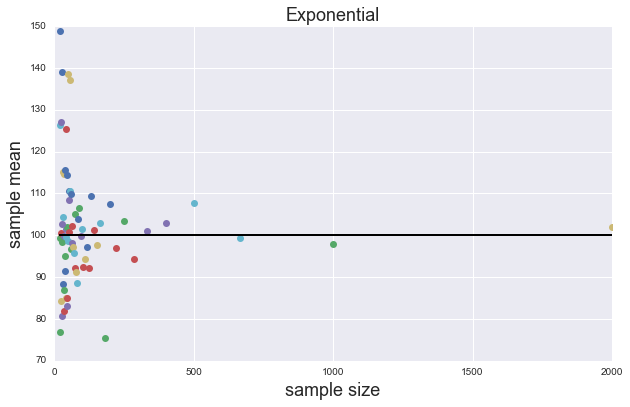

In [119]:
md['expo'] = {} 

#and do it in a for loop. not pythonic, but easily readable

for n in mysize:
    md['expo'][n] = np.random.exponential(mymean, size = n)
    
# save the means for plotting later    

md['expo']['means'] = {}
axexpo_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['expo']:
    if not type(nn) == str:
        md['expo']['means'][nn] = md['expo'][nn].mean()
        #and plot it
        axexpo_mu_n.plot(nn, md['expo']['means'][nn], 'o')
        axexpo_mu_n.set_xlabel('sample size', fontsize=18)
        axexpo_mu_n.set_ylabel('sample mean', fontsize=18)
        axexpo_mu_n.set_title('Exponential', fontsize=18)
        axexpo_mu_n.plot([min(mysize), max(mysize)], [mymean, mymean], 'k')

### Figure 14: A graph showing the relationship between sample size and sample mean for i.i.d. exponential variables. As sample size increases, the variance from the plotted population mean shrinks towards 0.

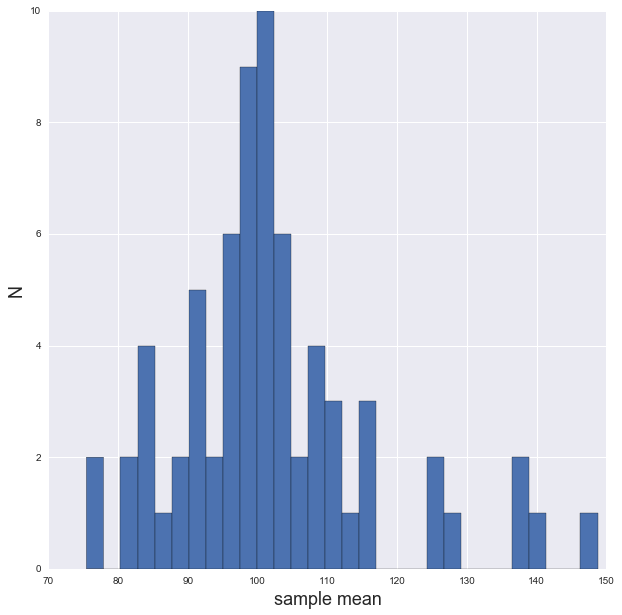

In [120]:
allmeans_expo = list(md['expo']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans_expo,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

### Figure 15: A histogram for the distribution of sample means for the exponential distributions

# Combining the data:

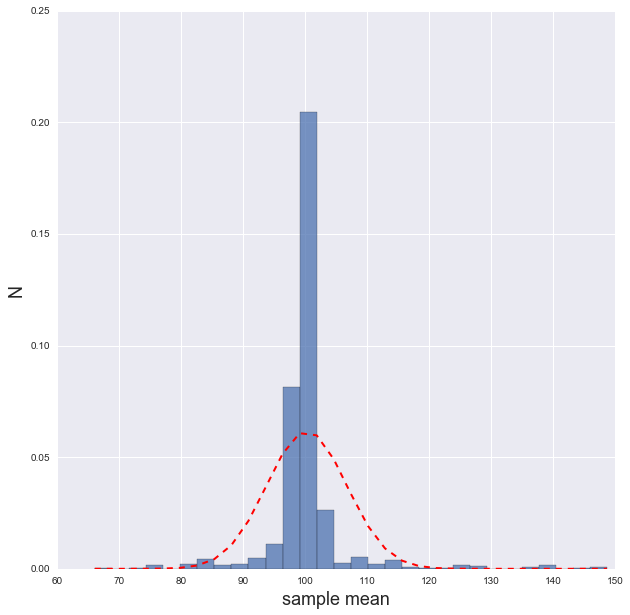

In [146]:
allmeans += allmeans_Chisq
allmeans += allmeans_gaus
allmeans += allmeans_pois
allmeans += allmeans_bin
allmeans += allmeans_expo

# Gaussian fit adapted from code at http://stackoverflow.com/questions/7805552/fitting-a-histogram-with-python
mu, std = scipy.stats.norm.fit(allmeans)

pl.figure(figsize=(10, 10))

# the histogram of the data
n, bins, patches = plt.hist(allmeans, 30, normed=1, alpha=0.75)

# add a 'best fit' line
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=2)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

### Figure 16: A normed histogram for the distribution of sample means for samples taken from all five of the different distributions. Their values are highly concentrated around the population mean (100 in this case). The red line indicates the gaussian distribution of best fit to the data.